Сначала предобработаем данные

In [ ]:
import pandas as pd

# Загружаем данные
df = pd.read_csv("Walmart_Sales.csv")

# 1. Проверка и удаление дубликатов
print("Количество дубликатов:", df.duplicated().sum())
df = df.drop_duplicates()

# 2. Проверка пропусков
print("Количество пропусков:\n", df.isnull().sum())

# Заполняем пропуски (если есть)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# 3. Проверка на шумы (например, отрицательные продажи не могут существовать)
if "Weekly_Sales" in df.columns:
    df = df[df["Weekly_Sales"] >= 0]

# 4. Финальная проверка
print(df.info())
print(df.describe())

# 5. Сохраняем предобработанный датасет
df.to_csv("Walmart_Sales_clean.csv", index=False)


Количество дубликатов: 0
Количество пропусков:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      

Загрузка данных и просмотр первых строк

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Walmart_Sales_clean.csv")

# Первые 5 строк
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


Анализ распределения переменных. Построим гистограмму распределения Weekly_Sales

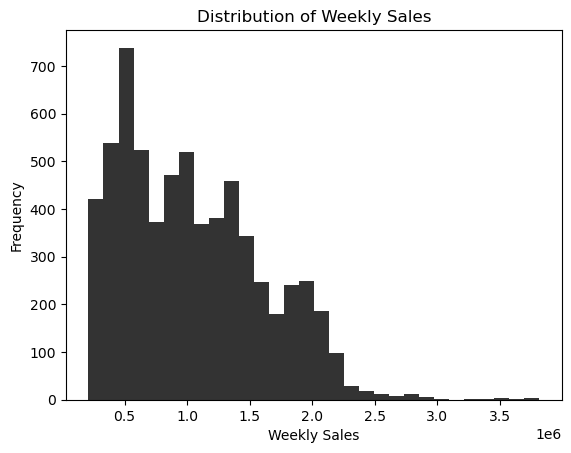

In [13]:
plt.hist(df['Weekly_Sales'], bins=30, color='black', alpha=0.8)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

Корреляция между переменными

Correlation between Temperature and Weekly Sales: -0.0638100131794696


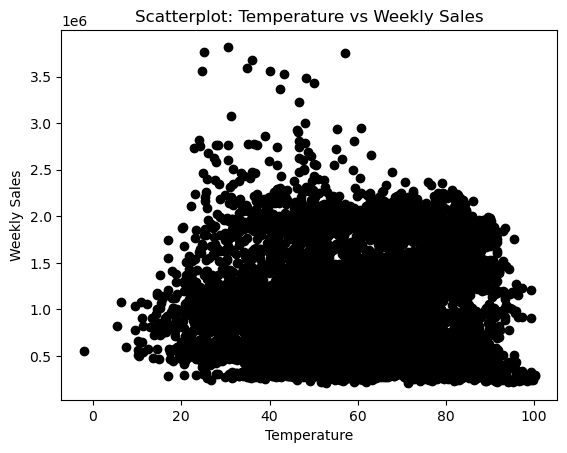

In [14]:
correlation = df['Temperature'].corr(df['Weekly_Sales'])
print("Correlation between Temperature and Weekly Sales:", correlation)

plt.scatter(df['Temperature'], df['Weekly_Sales'], color='black')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Scatterplot: Temperature vs Weekly Sales')
plt.show()


Вбросы и аномалии (Boxplot)

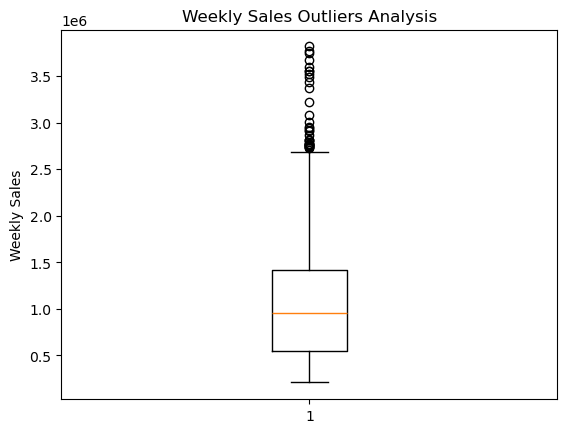

In [15]:
plt.boxplot(df['Weekly_Sales'])
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Outliers Analysis')
plt.show()

Анализ категориальных переменных. На графике представлены средние еженедельные продажи по каждому магазину. Видно, что между магазинами есть заметная разница: одни показывают стабильно более высокий уровень продаж, другие — значительно ниже. 
Каждая колонка — отдельный магазин (Store).
Высота колонки — средняя величина продаж за неделю (Weekly_Sales).

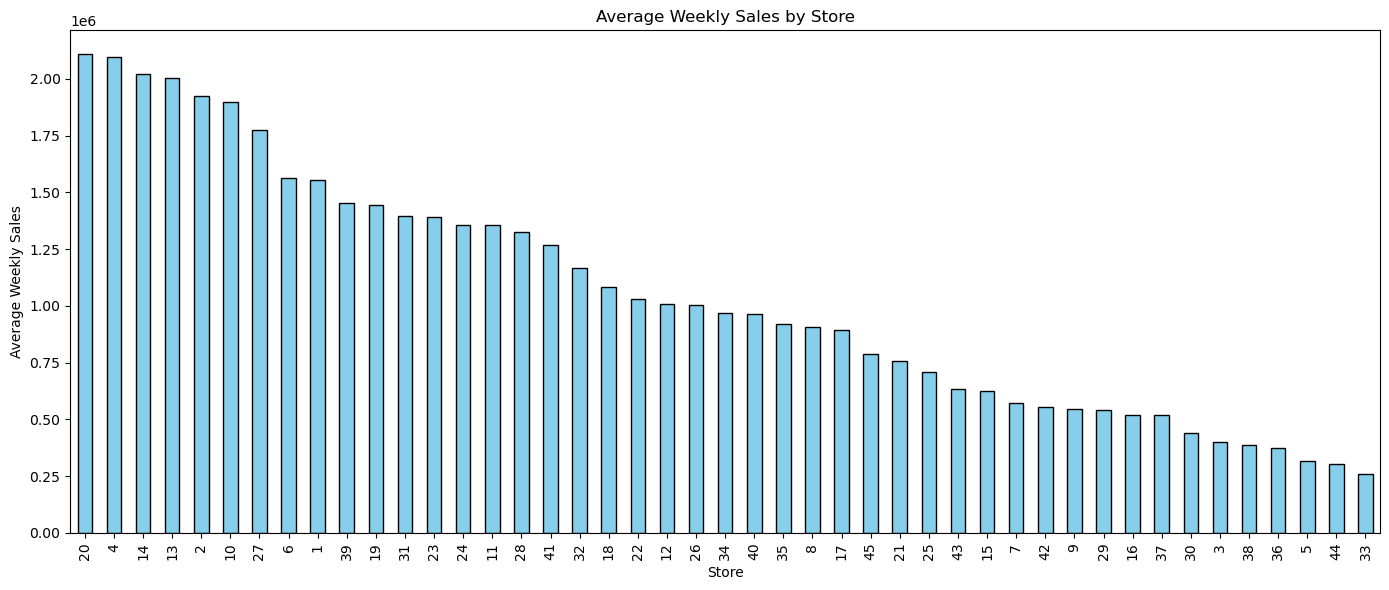

In [ ]:
avg_store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
avg_store_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Средние еженедельные продажи значительно различаются по магазинам. На графике видно, что есть несколько лидеров с продажами более 2 млн долларов в неделю, тогда как у отстающих магазинов показатель не превышает 0.3–0.4 млн. Это говорит о существенных различиях в масштабах и эффективности работы разных торговых точек.

In [ ]:
Создадим общий дашборд:

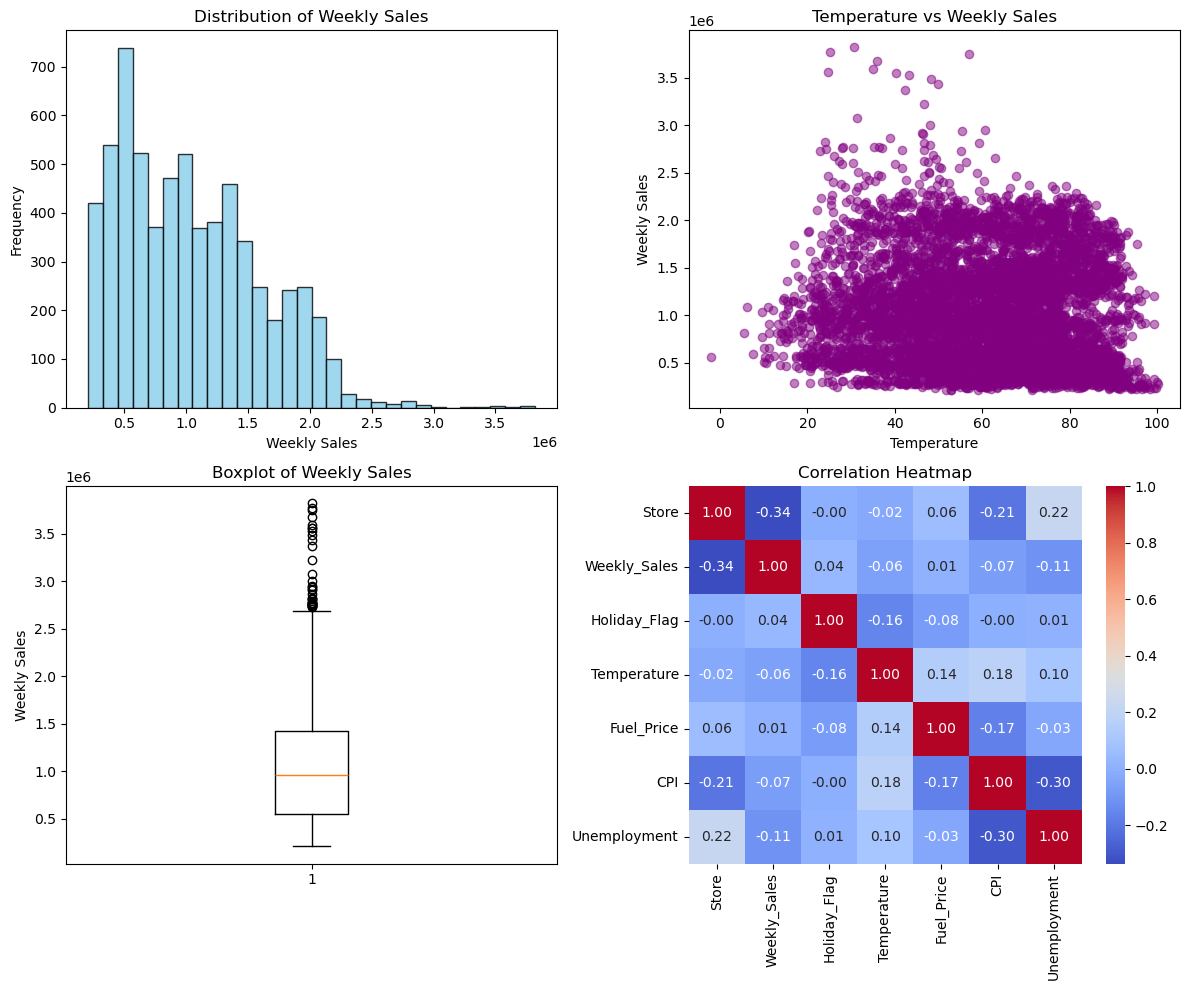

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# 1. Гистограмма Weekly_Sales
plt.subplot(2, 2, 1)
plt.hist(df['Weekly_Sales'], bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')

# 2. Диаграмма рассеяния Temperature vs Weekly Sales
plt.subplot(2, 2, 2)
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='purple', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales')

# 3. Ящик с усами для Weekly_Sales
plt.subplot(2, 2, 3)
plt.boxplot(df['Weekly_Sales'], vert=True)
plt.ylabel('Weekly Sales')
plt.title('Boxplot of Weekly Sales')

# 4. Тепловая карта корреляций (только числовые столбцы)
plt.subplot(2, 2, 4)
numeric_df = df.select_dtypes(include='number')  # выбираем только числовые столбцы
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')


plt.tight_layout()
plt.show()
